In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Data:-

In [2]:
data=pd.read_csv(r'C:\Users\arshiyasamreen\Downloads\train_Df64byy.csv')
train_data=data.copy()

In [3]:
train_data

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,C4,845,Rented,Individual,22,22,No,X3,NaN,NaN,18,7704.0,0
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1


# Checking the correlatrion:-

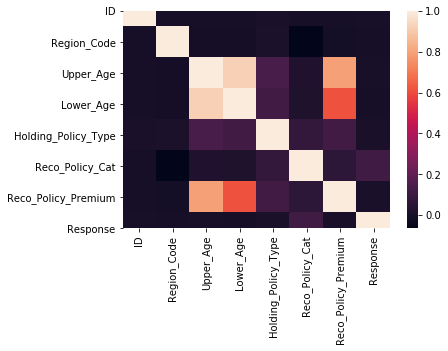

In [4]:
sns.heatmap(train_data.corr())

In [5]:
train_data.corr()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
ID,1.000000,-0.000465,-0.001725,0.001101,0.006649,-0.002235,-0.002350,0.005159
Region_Code,-0.000465,1.000000,-0.005649,-0.005928,0.011599,-0.065120,-0.010797,0.001121
Upper_Age,-0.001725,-0.005649,1.000000,0.921392,0.141890,0.025257,0.792689,0.002772
Lower_Age,0.001101,-0.005928,0.921392,1.000000,0.118028,0.021163,0.615739,-0.002099
Holding_Policy_Type,0.006649,0.011599,0.141890,0.118028,1.000000,0.079678,0.121342,0.009297
Reco_Policy_Cat,-0.002235,-0.065120,0.025257,0.021163,0.079678,1.000000,0.060989,0.114321
Reco_Policy_Premium,-0.002350,-0.010797,0.792689,0.615739,0.121342,0.060989,1.000000,0.007943
Response,0.005159,0.001121,0.002772,-0.002099,0.009297,0.114321,0.007943,1.000000


# Understanding the data:-

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
ID                         50882 non-null int64
City_Code                  50882 non-null object
Region_Code                50882 non-null int64
Accomodation_Type          50882 non-null object
Reco_Insurance_Type        50882 non-null object
Upper_Age                  50882 non-null int64
Lower_Age                  50882 non-null int64
Is_Spouse                  50882 non-null object
Health Indicator           39191 non-null object
Holding_Policy_Duration    30631 non-null object
Holding_Policy_Type        30631 non-null float64
Reco_Policy_Cat            50882 non-null int64
Reco_Policy_Premium        50882 non-null float64
Response                   50882 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 5.4+ MB


In [7]:
for i in train_data.columns:
    print(i,train_data[i].unique())

ID [    1     2     3 ... 50880 50881 50882]
City_Code ['C3' 'C5' 'C24' 'C8' 'C9' 'C1' 'C15' 'C28' 'C27' 'C7' 'C20' 'C25' 'C4'
 'C2' 'C34' 'C10' 'C17' 'C18' 'C16' 'C29' 'C33' 'C26' 'C19' 'C6' 'C12'
 'C13' 'C11' 'C14' 'C22' 'C23' 'C21' 'C36' 'C32' 'C30' 'C35' 'C31']
Region_Code [3213 1117 3732 ... 5326 6149 5450]
Accomodation_Type ['Rented' 'Owned']
Reco_Insurance_Type ['Individual' 'Joint']
Upper_Age [36 75 32 52 44 28 59 21 66 20 27 34 43 55 23 18 22 25 24 40 26 56 35 63
 49 64 67 42 71 57 73 31 19 48 65 54 33 30 69 68 37 29 62 58 38 39 60 41
 45 51 46 70 61 74 53 72 50 47]
Lower_Age [36 22 32 48 44 52 28 73 43 26 21 47 66 20 27 34 55 23 18 25 24 56 35 63
 64 67 75 42 71 68 31 19 65 54 33 74 30 69 29 62 58 39 60 57 41 40 45 37
 51 59 49 38 46 70 61 53 16 72 50 17]
Is_Spouse ['No' 'Yes']
Health Indicator ['X1' 'X2' nan 'X4' 'X3' 'X6' 'X5' 'X8' 'X7' 'X9']
Holding_Policy_Duration ['14+' nan '1.0' '3.0' '5.0' '9.0' '14.0' '7.0' '2.0' '11.0' '10.0' '8.0'
 '6.0' '4.0' '13.0' '12.0']
Holding

In [8]:
train_data.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

# Handling Missing Value:-

In [9]:
x=train_data['Health Indicator'].mode()
train_data['Health Indicator']=train_data['Health Indicator'].replace([np.nan],x)
y=train_data['Holding_Policy_Type'].mean()
train_data['Holding_Policy_Type']=train_data['Holding_Policy_Type'].replace([np.nan],y)
train_data['Holding_Policy_Duration']=list(map(lambda x:str(x).strip(' +'),train_data['Holding_Policy_Duration']))
train_data['Holding_Policy_Duration']=train_data['Holding_Policy_Duration'].apply(float)
z=train_data['Holding_Policy_Duration'].mean()
train_data['Holding_Policy_Duration']=train_data['Holding_Policy_Duration'].replace([np.nan],z)

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
ID                         50882 non-null int64
City_Code                  50882 non-null object
Region_Code                50882 non-null int64
Accomodation_Type          50882 non-null object
Reco_Insurance_Type        50882 non-null object
Upper_Age                  50882 non-null int64
Lower_Age                  50882 non-null int64
Is_Spouse                  50882 non-null object
Health Indicator           50882 non-null object
Holding_Policy_Duration    50882 non-null float64
Holding_Policy_Type        50882 non-null float64
Reco_Policy_Cat            50882 non-null int64
Reco_Policy_Premium        50882 non-null float64
Response                   50882 non-null int64
dtypes: float64(3), int64(6), object(5)
memory usage: 5.4+ MB


# Applying Dummies:-

In [11]:
dummies=pd.get_dummies(train_data)
dummies

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,City_Code_C1,...,Is_Spouse_Yes,Health Indicator_X1,Health Indicator_X2,Health Indicator_X3,Health Indicator_X4,Health Indicator_X5,Health Indicator_X6,Health Indicator_X7,Health Indicator_X8,Health Indicator_X9
0,1,3213,36,36,14.000000,3.000000,22,11628.0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,2,1117,75,22,6.015246,2.439228,22,30510.0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3,3732,32,32,1.000000,1.000000,19,7450.0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,4,4378,52,48,14.000000,3.000000,19,17780.0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,5,2190,44,44,3.000000,1.000000,16,10404.0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,845,22,22,6.015246,2.439228,18,7704.0,0,0,...,0,0,0,1,0,0,0,0,0,0
50878,50879,4188,27,27,7.000000,3.000000,4,5408.0,0,0,...,0,0,0,1,0,0,0,0,0,0
50879,50880,442,63,63,14.000000,1.000000,12,11374.0,0,1,...,0,0,1,0,0,0,0,0,0,0
50880,50881,4,71,49,2.000000,2.000000,16,28179.2,1,1,...,0,0,1,0,0,0,0,0,0,0


In [12]:
dummies.columns

Index(['ID', 'Region_Code', 'Upper_Age', 'Lower_Age',
       'Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat',
       'Reco_Policy_Premium', 'Response', 'City_Code_C1', 'City_Code_C10',
       'City_Code_C11', 'City_Code_C12', 'City_Code_C13', 'City_Code_C14',
       'City_Code_C15', 'City_Code_C16', 'City_Code_C17', 'City_Code_C18',
       'City_Code_C19', 'City_Code_C2', 'City_Code_C20', 'City_Code_C21',
       'City_Code_C22', 'City_Code_C23', 'City_Code_C24', 'City_Code_C25',
       'City_Code_C26', 'City_Code_C27', 'City_Code_C28', 'City_Code_C29',
       'City_Code_C3', 'City_Code_C30', 'City_Code_C31', 'City_Code_C32',
       'City_Code_C33', 'City_Code_C34', 'City_Code_C35', 'City_Code_C36',
       'City_Code_C4', 'City_Code_C5', 'City_Code_C6', 'City_Code_C7',
       'City_Code_C8', 'City_Code_C9', 'Accomodation_Type_Owned',
       'Accomodation_Type_Rented', 'Reco_Insurance_Type_Individual',
       'Reco_Insurance_Type_Joint', 'Is_Spouse_No', 'Is_Spouse_Yes

In [13]:
x=dummies.drop(columns='Response')
y=dummies['Response']

# Feature Selection:-

In [14]:
import statsmodels.api as sm

In [15]:
model=sm.GLM(y,x).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Response   No. Observations:                50882
Model:                            GLM   Df Residuals:                    50827
Model Family:                Gaussian   Df Model:                           54
Link Function:               identity   Scale:                         0.17988
Method:                          IRLS   Log-Likelihood:                -28527.
Date:                Tue, 16 Mar 2021   Deviance:                       9142.6
Time:                        15:49:36   Pearson chi2:                 9.14e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
ID          

In [16]:
features=model.pvalues.sort_values(ascending=True)
features[features<0.025]

Reco_Policy_Cat                   1.524419e-153
Accomodation_Type_Rented           1.501252e-14
Accomodation_Type_Owned            2.636862e-12
Is_Spouse_No                       9.996432e-11
Reco_Insurance_Type_Joint          3.487975e-09
Is_Spouse_Yes                      1.985951e-03
Holding_Policy_Duration            3.198640e-03
Reco_Insurance_Type_Individual     9.374756e-03
City_Code_C15                      1.447450e-02
Health Indicator_X7                1.695102e-02
dtype: float64

In [17]:
selected_features=list(features[features<0.025].index)+['Response']
print(selected_features)

['Reco_Policy_Cat', 'Accomodation_Type_Rented', 'Accomodation_Type_Owned', 'Is_Spouse_No', 'Reco_Insurance_Type_Joint', 'Is_Spouse_Yes', 'Holding_Policy_Duration', 'Reco_Insurance_Type_Individual', 'City_Code_C15', 'Health Indicator_X7', 'Response']


In [18]:
features_data=dummies[selected_features]
features_data.head()

,Reco_Policy_Cat,Accomodation_Type_Rented,Accomodation_Type_Owned,Is_Spouse_No,Reco_Insurance_Type_Joint,Is_Spouse_Yes,Holding_Policy_Duration,Reco_Insurance_Type_Individual,City_Code_C15,Health Indicator_X7,Response
0,22,1,0,1,0,0,14.000000,1,0,0,0
1,22,0,1,1,1,0,6.015246,0,0,0,0
2,19,0,1,1,0,0,1.000000,1,0,0,1
3,19,0,1,1,1,0,14.000000,0,0,0,0
4,16,1,0,1,0,0,3.000000,1,0,0,0


In [19]:
features_data.to_csv('Machine_Learning',index=False)

# Cleaned Data:-

In [20]:
data=pd.read_csv('Machine_Learning')

In [21]:
data

,Reco_Policy_Cat,Accomodation_Type_Rented,Accomodation_Type_Owned,Is_Spouse_No,Reco_Insurance_Type_Joint,Is_Spouse_Yes,Holding_Policy_Duration,Reco_Insurance_Type_Individual,City_Code_C15,Health Indicator_X7,Response
0,22,1,0,1,0,0,14.000000,1,0,0,0
1,22,0,1,1,1,0,6.015246,0,0,0,0
2,19,0,1,1,0,0,1.000000,1,0,0,1
3,19,0,1,1,1,0,14.000000,0,0,0,0
4,16,1,0,1,0,0,3.000000,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
50877,18,1,0,1,0,0,6.015246,1,0,0,0
50878,4,1,0,1,0,0,7.000000,1,0,0,0
50879,12,1,0,1,0,0,14.000000,1,0,0,0
50880,16,0,1,1,1,0,2.000000,0,0,0,1


# Up-Sampling:-

In [22]:
data_no=data[data['Response']==0]
data_yes=data[data['Response']==1]

In [23]:
from sklearn.utils import resample

In [24]:
data_yes_resample=resample(data_yes,replace=True)
data_yes_resample

,Reco_Policy_Cat,Accomodation_Type_Rented,Accomodation_Type_Owned,Is_Spouse_No,Reco_Insurance_Type_Joint,Is_Spouse_Yes,Holding_Policy_Duration,Reco_Insurance_Type_Individual,City_Code_C15,Health Indicator_X7,Response
11238,12,0,1,0,1,1,3.000000,0,0,0,1
10116,10,0,1,1,0,0,8.000000,1,0,0,1
47520,22,1,0,1,0,0,14.000000,1,0,0,1
19648,21,0,1,1,0,0,6.015246,1,0,0,1
23658,21,0,1,1,0,0,6.000000,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
47651,7,1,0,1,0,0,6.015246,1,0,0,1
20875,19,1,0,1,0,0,1.000000,1,1,0,1
43668,20,0,1,1,0,0,6.000000,1,0,0,1
40733,22,0,1,1,0,0,11.000000,1,0,0,1


In [25]:
data_resample=pd.concat([data_no,data_yes_resample],axis=0)

In [26]:
(data_resample['Response'].value_counts())/len(data_resample['Response'])

0    0.760053
1    0.239947
Name: Response, dtype: float64

In [27]:
x=data_resample.iloc[:,:-1]
y=data_resample.iloc[:,-1:]

In [28]:
import numpy as np
np.random.seed(1001)
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [30]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((35617, 10), (15265, 10), (35617, 1), (15265, 1))

# Logistic regression:-

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
log=LogisticRegression()
log.fit(x_train,y_train)

C:\Users\arshiyasamreen\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,auc

In [34]:
y_pred=log.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
cr=classification_report(y_test,y_pred)
print(cr)
roc_auc = roc_auc_score(y_test,y_pred)
print(roc_auc)

[[11598     0]
 [ 3667     0]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86     11598
           1       0.00      0.00      0.00      3667

    accuracy                           0.76     15265
   macro avg       0.38      0.50      0.43     15265
weighted avg       0.58      0.76      0.66     15265

0.5


C:\Users\arshiyasamreen\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


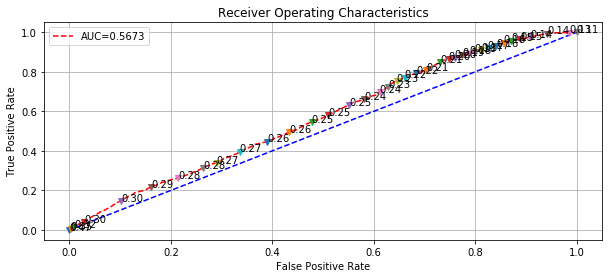

In [35]:
# Roc_Auc_Curve
y_pred_train_prob=log.predict_proba(x_train)
y_pred_train_prob1=y_pred_train_prob[:,1]
fpr,tpr,proba=roc_curve(y_train,y_pred_train_prob1)
plt.figure(figsize=(10,4))
plt.plot(fpr,tpr,'r--')
plt.plot([0,1],[0,1],'b--')
for i in range(len(proba)):
    if i%50==1:
        plt.plot(fpr[i],tpr[i],'v')
        plt.text(fpr[i],tpr[i],'%0.2f'%proba[i])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
area=auc(fpr,tpr)
plt.legend(['AUC=%0.4F'%area])
plt.grid()

# Decision Tree:-

In [36]:
from sklearn.metrics import cohen_kappa_score,roc_auc_score
from  sklearn.tree import DecisionTreeClassifier

In [37]:
dt=DecisionTreeClassifier(criterion='gini')
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [38]:
y_pred=dt.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
cr=classification_report(y_test,y_pred)
print(cr)
kappa_score=cohen_kappa_score(y_test,y_pred)
print("Kappa score =",kappa_score)

[[11307   291]
 [ 3413   254]]
              precision    recall  f1-score   support

           0       0.77      0.97      0.86     11598
           1       0.47      0.07      0.12      3667

    accuracy                           0.76     15265
   macro avg       0.62      0.52      0.49     15265
weighted avg       0.70      0.76      0.68     15265

Kappa score = 0.062315803788279056


# Random Forest:-

In [39]:
from  sklearn.ensemble import RandomForestClassifier

In [40]:
rf=RandomForestClassifier(criterion='gini')
rf.fit(x_train,y_train)

C:\Users\arshiyasamreen\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [41]:
y_pred=rf.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
cr=classification_report(y_test,y_pred)
print(cr)
kappa_score=cohen_kappa_score(y_test,y_pred)
print("Kappa score =",kappa_score)

[[11271   327]
 [ 3390   277]]
              precision    recall  f1-score   support

           0       0.77      0.97      0.86     11598
           1       0.46      0.08      0.13      3667

    accuracy                           0.76     15265
   macro avg       0.61      0.52      0.49     15265
weighted avg       0.69      0.76      0.68     15265

Kappa score = 0.06627065289743483


**KNN**

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

C:\Users\arshiyasamreen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [43]:
y_pred=knn.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
cr=classification_report(y_test,y_pred)
print(cr)
kappa_score=cohen_kappa_score(y_test,y_pred)
print("Kappa score =",kappa_score)

[[10601   997]
 [ 3100   567]]
              precision    recall  f1-score   support

           0       0.77      0.91      0.84     11598
           1       0.36      0.15      0.22      3667

    accuracy                           0.73     15265
   macro avg       0.57      0.53      0.53     15265
weighted avg       0.67      0.73      0.69     15265

Kappa score = 0.08540600094128703


# Naive_Bays:-

In [44]:
from sklearn.naive_bayes import BernoulliNB

#Create a Gaussian Classifier
bnb =BernoulliNB(binarize=0.0)

#Train the model using the training sets
bnb.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = bnb.predict(x_test)

C:\Users\arshiyasamreen\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7597772682607271


# Model Building with k fold:-

# Logistic:-

In [46]:
from sklearn.datasets import make_classification
x, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
print(x.shape, y.shape)
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# create dataset
x, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(log, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

(100, 20) (100,)
Accuracy: 0.850 (0.128)


# Decision:-

In [48]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from  sklearn.tree import DecisionTreeClassifier
# create dataset
x, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(dt, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.650 (0.120)


# RandomForest:-

In [49]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# create dataset
x, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(rf, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.780 (0.117)


# KNN:-

In [50]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# create dataset
x, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = KNeighborsClassifier(n_neighbors=5)# evaluate model
scores = cross_val_score(knn, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.770 (0.110)


In [51]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import BernoulliNB

#Create a Gaussian Classifier
# create dataset
x, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model =BernoulliNB(binarize=0.0)
scores = cross_val_score(knn, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.770 (0.110)


# Test Data:-

In [52]:
test_data=pd.read_csv(r'C:\Users\arshiyasamreen\Downloads\test_YCcRUnU.csv')

In [53]:
test_data

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21800,72683,C3,1044,Owned,Individual,45,45,No,X1,4.0,1.0,18,15884.0
21801,72684,C4,266,Owned,Individual,59,59,No,X5,6.0,3.0,18,21390.0
21802,72685,C12,2470,Owned,Individual,74,74,No,X3,NaN,NaN,1,17836.0
21803,72686,C10,1676,Rented,Individual,25,25,No,X4,3.0,1.0,19,11568.0


In [54]:
test_data.isnull().sum()

ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

In [55]:
x=test_data['Health Indicator'].mode()
test_data['Health Indicator']=test_data['Health Indicator'].replace([np.nan],x)
y=test_data['Holding_Policy_Type'].mean()
test_data['Holding_Policy_Type']=test_data['Holding_Policy_Type'].replace([np.nan],y)
test_data['Holding_Policy_Duration']=list(map(lambda x:str(x).strip(' +'),test_data['Holding_Policy_Duration']))
test_data['Holding_Policy_Duration']=test_data['Holding_Policy_Duration'].apply(float)
z=test_data['Holding_Policy_Duration'].mean()
test_data['Holding_Policy_Duration']=test_data['Holding_Policy_Duration'].replace([np.nan],z)

In [56]:
test_data

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,X1,6.000000,3.000000,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.000000,3.000000,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.000000,4.000000,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.000000,3.000000,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,6.050523,2.440085,5,22534.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21800,72683,C3,1044,Owned,Individual,45,45,No,X1,4.000000,1.000000,18,15884.0
21801,72684,C4,266,Owned,Individual,59,59,No,X5,6.000000,3.000000,18,21390.0
21802,72685,C12,2470,Owned,Individual,74,74,No,X3,6.050523,2.440085,1,17836.0
21803,72686,C10,1676,Rented,Individual,25,25,No,X4,3.000000,1.000000,19,11568.0


In [57]:
col=x_train.columns

In [58]:
dummies=pd.get_dummies(test_data)
m=dummies[col]

In [59]:
m.head()

,Reco_Policy_Cat,Accomodation_Type_Rented,Accomodation_Type_Owned,Is_Spouse_No,Reco_Insurance_Type_Joint,Is_Spouse_Yes,Holding_Policy_Duration,Reco_Insurance_Type_Individual,City_Code_C15,Health Indicator_X7
0,5,0,1,1,0,0,6.000000,1,0,0
1,18,0,1,0,1,1,3.000000,0,0,0
2,17,1,0,1,0,0,2.000000,1,0,0
3,18,1,0,1,0,0,3.000000,1,0,0
4,5,0,1,1,0,0,6.050523,1,0,0


In [60]:
ypred_test=log.predict(m)

In [61]:
ypred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [62]:
a=pd.Series(ypred_test)
a.value_counts()

0    21805
dtype: int64

In [63]:
data['Response']

0        0
1        0
2        1
3        0
4        0
        ..
50877    0
50878    0
50879    0
50880    1
50881    0
Name: Response, Length: 50882, dtype: int64

In [64]:
ypred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)